# Extract Strings from Spritesheets

In [2]:
from IPython.display import display, HTML
#Enable horizontal scrolling on output
#display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Increase the width
display(HTML("<style>.container { width:80% !important; }</style>"))


In [3]:
import math
from PIL import Image, ImageColor
import numpy as np
from cry_rgb import cry_to_rgb

def convert_black_to_transparent(img, tolerance=20):
    # Open the image and ensure it's in RGBA mode to handle the alpha channel
    img = img.convert("RGBA")
    datas = img.getdata()

    new_data = []
    # Define the target color (black) and the replacement color (transparent)
    target_color = (tolerance, tolerance, tolerance)
    transparent_color = (0, 0, 0, 0) # R, G, B, A (0 for full transparency)

    for item in datas:
        # Check if the pixel's RGB values match the target color
        if item[0] < target_color[0] and item[1] < target_color[1] and item[2] < target_color[2]:
            new_data.append(transparent_color)
        else:
            # Keep other pixels unchanged (including their existing alpha value, if any)
            new_data.append(item)

    img.putdata(new_data)
    return img

def getPixels(file_name):
    width = 320
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

## Text using large font in beasty8

In [4]:
font8 = {
    "A": (1,1,30,32),
    "B": (36,1,66,32),
    "C": (71,1,100,32),
    "D": (106,1,136,32),
    'E': (141, 1, 170, 32),
    'F': (176, 1, 205, 32),
    'G': (211, 1, 240, 32),
    'H': (246, 1, 275, 32),
    'I': (281, 1, 310, 32),
    'J': (1, 36, 30, 68),
    'K': (36, 36, 65, 68),
    'L': (71, 36, 100, 68),
    'M': (106, 36, 135, 68),
    'N': (141, 36, 170, 68),
    'O': (176, 36, 205, 68),
    'P': (211, 36, 240, 68),
    'Q': (246, 36, 275, 68),
    'R': (281, 36, 310, 68),
    'S': (1, 71, 30, 101),
    'T': (36, 71, 65, 101),
    'U': (71, 71, 100, 101),
    'V': (106, 71, 135, 101),
    'W': (141, 71, 170, 101),
    'X': (176, 71, 205, 101),
    'Y': (211, 71, 240, 101),
    'Z': (246, 71, 275, 101),
}

In [5]:
from PIL import ImageDraw, Image
pixels = getPixels('cry/beasty8.cry')
subpixels = pixels
font_sheet = Image.fromarray(subpixels,mode='RGB')

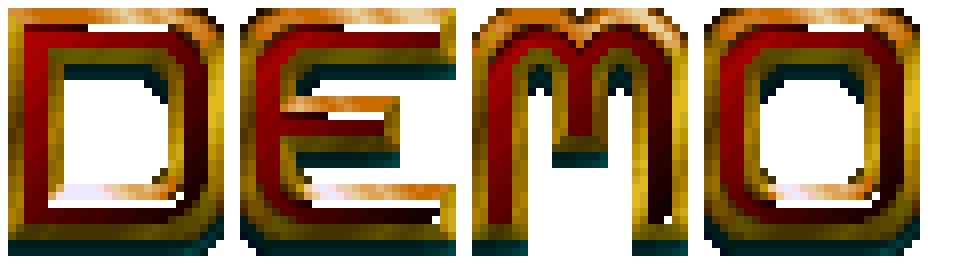

In [6]:
demo_message = Image.new("RGB", (120,33), "black")
string = "DEMO"
x = 1
for c in string:
    C = font_sheet.crop(font8[c])
    demo_message.paste(C, (x, 1))
    x+=29
demo_message = demo_message.resize((demo_message.width * 8, demo_message.height * 8), Image.NEAREST)
convert_black_to_transparent(demo_message).save("t2kdemo/demo.png")
convert_black_to_transparent(demo_message,tolerance=18)

## Text using small font in beasty3

In [7]:
font3 = {
 'A': (27, 181, 35, 189),
 'B': (38, 181, 46, 189),
 'C': (49, 181, 57, 189),
 'D': (60, 181, 68, 189),
 'E': (71, 181, 79, 189),
 'F': (82, 181, 90, 189),
 'G': (93, 181, 101, 189),
 'H': (104, 181, 112, 189),
 'I': (115, 181, 123, 189),
 'J': (126, 181, 134, 189),
 'K': (137, 181, 145, 189),
 'L': (148, 181, 156, 189),
 'M': (159, 181, 167, 189),
 'N': (170, 181, 178, 189),
 'O': (181, 181, 189, 189),
 'P': (192, 181, 200, 189),
 'Q': (203, 181, 211, 189),
 'R': (214, 181, 222, 189),
 'S': (225, 181, 233, 189),
 'T': (236, 181, 244, 189),
 'U': (247, 181, 255, 189),
 'V': (258, 181, 266, 189),
 'W': (269, 181, 277, 189),
 'X': (280, 181, 288, 189),
 'Y': (291, 181, 299, 189),
 'Z': (302, 181, 310, 189),
 ' ': (313, 181, 321, 189),
 'a': (27, 191, 35, 199),
 'b': (38, 191, 46, 199),
 'c': (49, 191, 57, 199),
 'd': (60, 191, 68, 199),
 'e': (71, 191, 79, 199),
 'f': (82, 191, 90, 199),
 'g': (93, 191, 101, 199),
 'h': (104, 191, 112, 199),
 'i': (115, 191, 123, 199),
 'j': (126, 191, 134, 199),
 'k': (137, 191, 145, 199),
 'l': (148, 191, 156, 199),
 'm': (159, 191, 167, 199),
 'n': (170, 191, 178, 199),
 'o': (181, 191, 189, 199),
 'p': (192, 191, 200, 199),
 'q': (203, 191, 211, 199),
 'r': (214, 191, 222, 199),
 's': (225, 191, 233, 199),
 't': (236, 191, 244, 199),
 'u': (247, 191, 255, 199),
 'v': (258, 191, 266, 199),
 'w': (269, 191, 277, 199),
 'x': (280, 191, 288, 199),
 'y': (291, 191, 299, 199),
 'z': (302, 191, 310, 199),
}

In [8]:
from PIL import ImageDraw, Image
pixels = getPixels('cry/beasty3.cry')
subpixels = pixels
font_sheet3 = Image.fromarray(subpixels,mode='RGB')


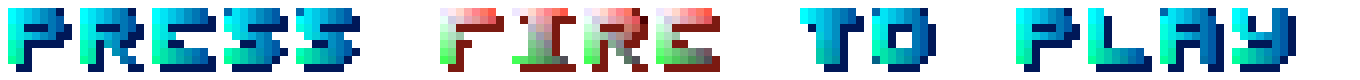

In [9]:
demo_message = Image.new("RGBA", (170,10), "black")
string = "press FIRE to play"
x = 1
for c in string:
    C = font_sheet3.crop(font3[c])
    demo_message.paste(C, (x, 1))
    x+=9
demo_message = demo_message.resize((demo_message.width * 8, demo_message.height * 8), Image.NEAREST)
#demo_message.save("t2kdemo/pressfiretoplay.png")
#convert_black_to_transparent(demo_message).save("t2kdemo/pressfiretoplay.png")
convert_black_to_transparent(demo_message)

# Rough Work